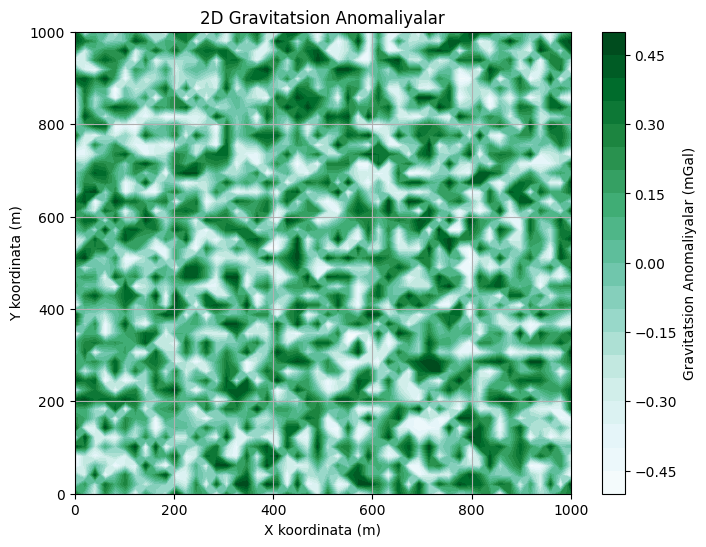

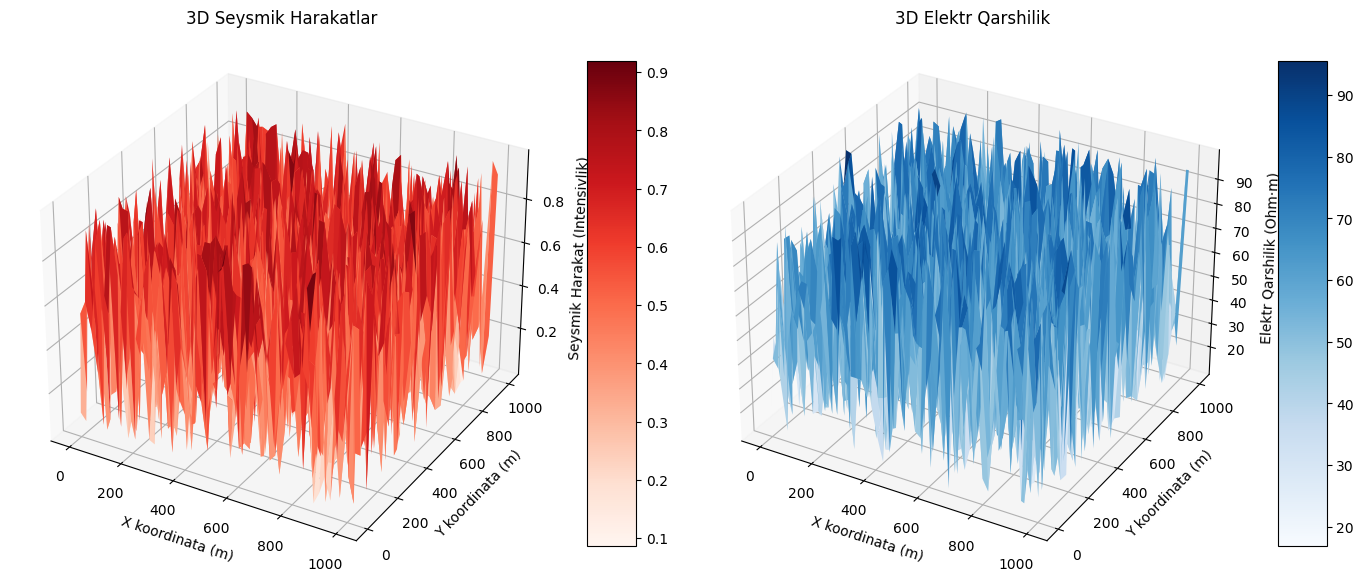


Xulosa:
1. Seysmik harakatlar (>0.8) xavfli zonalar sifatida belgilandi.
2. Elektr qarshilik (<30 ohm-m) past bo‘lgan joylar bo‘shliqlar yoki suv to‘la qatlamlarni ko‘rsatadi.
3. Gravitatsion anomaliyalar yordamida kon osti strukturalarini aniqlash samarali.



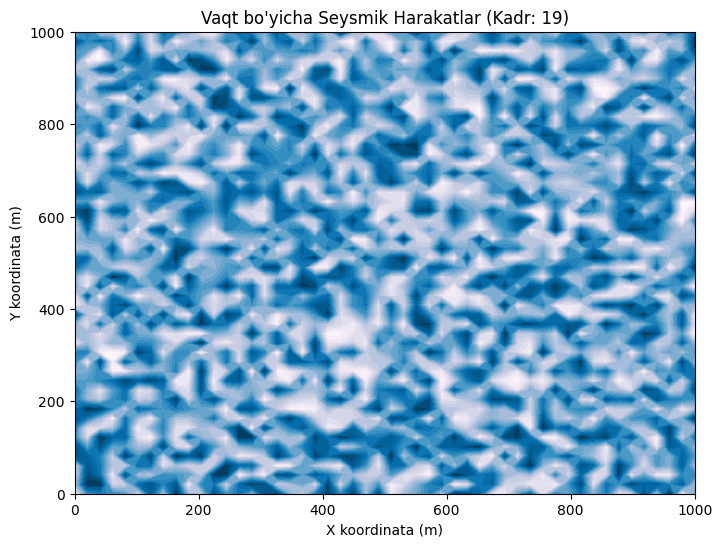

In [3]:
# Kutubxonalarni import qilish
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# 1. Geofizik ma'lumotlarni tayyorlash
np.random.seed(42)

# Sun'iy koordinatalar va chuqurliklar
x = np.linspace(0, 1000, 50)  # Gorizontal koordinatalar (m)
y = np.linspace(0, 1000, 50)  # Gorizontal koordinatalar (m)
depth = np.linspace(0, 300, 20)  # Chuqurliklar (m)

# Geofizik o'lchovlar
seismic_activity = np.random.uniform(0, 1, (len(depth), len(x), len(y)))  # Seysmik harakatlar
gravity_anomalies = np.random.uniform(-0.5, 0.5, (len(x), len(y)))  # Gravitatsion anomaliyalar
resistivity = np.random.uniform(10, 100, (len(depth), len(x), len(y)))  # Elektr qarshilik

# Xavfli zonalarni aniqlash
danger_zone_seismic = seismic_activity > 0.8
danger_zone_resistivity = resistivity < 30

# 2. Gravitatsion anomaliyalarni 2D grafikda tasvirlash
plt.figure(figsize=(8, 6))
plt.contourf(x, y, gravity_anomalies, cmap="BuGn", levels=20)
plt.colorbar(label="Gravitatsion Anomaliyalar (mGal)")
plt.title("2D Gravitatsion Anomaliyalar")
plt.xlabel("X koordinata (m)")
plt.ylabel("Y koordinata (m)")
plt.grid(True)
plt.show()

# 3. Seysmik harakat va qarshilikni 3D grafikda solishtirish
fig = plt.figure(figsize=(14, 10))

# Seysmik harakatlar
ax1 = fig.add_subplot(121, projection='3d')
X, Y = np.meshgrid(x, y)
Z_seismic = seismic_activity[10]  # 10-darajadagi chuqurlikdagi seysmik harakatlar
surf1 = ax1.plot_surface(X, Y, Z_seismic, cmap="Reds", edgecolor="none")
ax1.set_title("3D Seysmik Harakatlar")
ax1.set_xlabel("X koordinata (m)")
ax1.set_ylabel("Y koordinata (m)")
ax1.set_zlabel("Seysmik Harakat (Intensivlik)")
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)

# Elektr qarshilik
ax2 = fig.add_subplot(122, projection='3d')
Z_resistivity = resistivity[10]  # 10-darajadagi chuqurlikdagi elektr qarshilik
surf2 = ax2.plot_surface(X, Y, Z_resistivity, cmap="Blues", edgecolor="none")
ax2.set_title("3D Elektr Qarshilik")
ax2.set_xlabel("X koordinata (m)")
ax2.set_ylabel("Y koordinata (m)")
ax2.set_zlabel("Elektr Qarshilik (Ohm·m)")
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()

# 4. Animatsiya: Seysmik harakatlar o'zgarishini ko'rsatish
def create_animation():
    fig, ax = plt.subplots(figsize=(8, 6))

    def update(frame):
        ax.clear()
        Z = seismic_activity[frame]
        cont = ax.contourf(x, y, Z, cmap="PuBu", levels=20)
        ax.set_title(f"Vaqt bo'yicha Seysmik Harakatlar (Kadr: {frame})")
        ax.set_xlabel("X koordinata (m)")
        ax.set_ylabel("Y koordinata (m)")
        return cont

    ani = FuncAnimation(fig, update, frames=len(depth), interval=300, blit=False)
    return ani

# Animatsiyani ko'rsatish
ani = create_animation()
HTML(ani.to_jshtml())

# 5. Xulosa chiqarish
print("""
Xulosa:
1. Seysmik harakatlar (>0.8) xavfli zonalar sifatida belgilandi.
2. Elektr qarshilik (<30 ohm-m) past bo‘lgan joylar bo‘shliqlar yoki suv to‘la qatlamlarni ko‘rsatadi.
3. Gravitatsion anomaliyalar yordamida kon osti strukturalarini aniqlash samarali.
""")
